In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm 
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [113]:
def read_datasets():

    encoder = LabelEncoder()

    path = '/home/juan/Desktop/TESIS/Codes/codesTesis/Paso2/Training_Dataset.csv'
    
#Fecha	Value (%)	Value (hPa)	Value (W/m2)	Value (°C)	Value (mm)	Monthly sin	Monthly cos	Bi-monthly sin	Bi-monthly cos	Wind X	Wind Y

    complete_dataset = pd.read_csv(path, index_col=0)
    
    label_df = complete_dataset.pop("Label")
    Y = encoder.fit_transform(label_df)

    datasetPCA = pd.read_csv(path, usecols= ['Value (%)', 'Value (hPa)','Value (°C)','Wind X'])
    
    datasetRR = pd.read_csv(path, usecols= ['Value (hPa)','Value (°C)','Wind X','Wind Y'])
    
    #print("\ncomplete_dataset",complete_dataset.shape)
    #print("complete_dataset\n",complete_dataset.head())
    #print("\ndatasetPCA",datasetPCA.shape)
    #print("datasetPCA\n",datasetPCA.head())
    #print("\ndatasetRR",datasetRR.shape)
    #print("\ndatasetRR\n",datasetRR.head())

    


    #return(complete_dataset,reduced_datasetPCA1,reduced_datasetPCA2,reduced_datasetRelief1,reduced_datasetRelief2,reduced_dataset_PCA_Relief,Y)
    return(complete_dataset,datasetPCA,datasetRR,Y)


In [114]:
def standarize(Dataset):
    # z= (x - u) / s
    # where u=mean, s= stand deviatoin

    #cols names
    names = Dataset.columns   

    # Create the Scaler object
    scaler = preprocessing.StandardScaler()
    
    # Fit your data on the scaler object
    scaled_Dataset = scaler.fit_transform(Dataset)
    scaled_Dataset = pd.DataFrame(scaled_Dataset, columns=names)    

    return(scaled_Dataset)


In [115]:
def graph_bp(scores):    
    scores_frame = pd.DataFrame.from_dict(scores)
    boxplot = scores_frame.boxplot(grid=True, rot=45, fontsize=15)
    boxplot.set_ylabel("Accuracy")
    plt.savefig('BoxPlot_three_classSVM.eps',bbox_inches='tight')    
    plt.show()

In [116]:
def trainSVM(X,Y,name,scoreDataset):

    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(Y), test_size = 0.25)

        #make_svv
        clf =  svm.SVC(kernel='rbf',C=1, gamma=1, max_iter=-1,class_weight='balanced')

        # Train classifier 
        clf.fit(X_train, y_train)               

        # Mean accuracy of self.predict(X) wrt. y.            
        accu=np.round(clf.score(X_test, y_test) *100,decimals=3)      

        #if accu>87:
            #print("Accuracy=",accu,"%")
            #s=input("save?")
            #if s =='y':
            #  filename = 'SVM_'+name+'.joblib'
            #  dump(clf, filename)        

        scoreDataset.append(accu)  

In [117]:
complete_dataset,datasetPCA,datasetRR,Y = read_datasets()
scores= {'Complete Dataset':[],
        'Dataset PCA':[],
        'Dataset RR':[]
        }

DataSets = [complete_dataset,datasetPCA,datasetRR]
dataset_name=['Complete Dataset','Dataset PCA','Dataset RR']




Standanrized Dataset Complete Dataset


Standanrized Dataset Dataset PCA


Standanrized Dataset Dataset RR


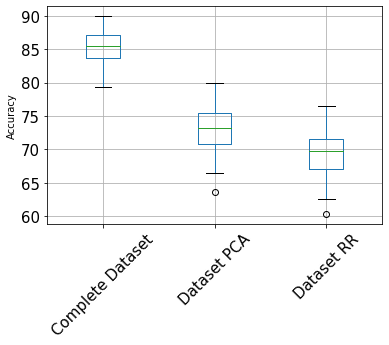

Mean accuracy of Complete Dataset after 100 repetitions is 85.24
Mean accuracy of Dataset PCA after 100 repetitions is 73.084
Mean accuracy of Dataset RR after 100 repetitions is 69.318


In [118]:
i=0

for X in DataSets:
    print("\n\nStandanrized Dataset",dataset_name[i])
    scaled_X = standarize(X)
    trainSVM(scaled_X,Y,dataset_name[i],scores[dataset_name[i]])
        
    i=i+1

graph_bp(scores)
for dataset in scores:
    print("Mean accuracy of",dataset,"after 100 repetitions is",np.round(np.mean(scores[dataset]),decimals=3))




NOT standanrized Dataset Complete Dataset


NOT standanrized Dataset Dataset PCA


NOT standanrized Dataset Dataset RR


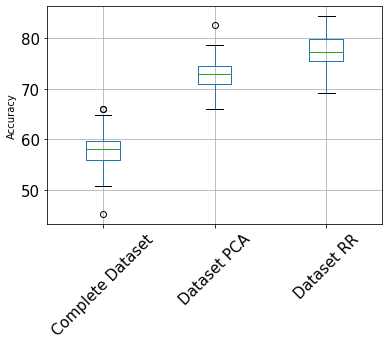

Mean accuracy of Complete Dataset after 100 repetitions is 57.81
Mean accuracy of Dataset PCA after 100 repetitions is 72.737
Mean accuracy of Dataset RR after 100 repetitions is 77.481


In [119]:
complete_dataset,datasetPCA,datasetRR,Y = read_datasets()
scores= {'Complete Dataset':[],
        'Dataset PCA':[],
        'Dataset RR':[]
        }

DataSets = [complete_dataset,datasetPCA,datasetRR]
dataset_name=['Complete Dataset','Dataset PCA','Dataset RR']
i=0

for X in DataSets:
    print("\n\nNOT standanrized Dataset",dataset_name[i])
    #scaled_X = standarize(X)
    trainSVM(X,Y,dataset_name[i],scores[dataset_name[i]])
        
    i=i+1

graph_bp(scores)
for dataset in scores:
    print("Mean accuracy of",dataset,"after 100 repetitions is",np.round(np.mean(scores[dataset]),decimals=3))
